In [10]:
import pandas as pd # Importamos Pandas con el alias de pd  (estandar) para el manejo de datos
import numpy as np # Importamos Numpy con el alias de np (estandar) para algebra lineal


# Algoritmos empleados
# ==============================================================================
import sklearn 
from sklearn import linear_model # Importamos el modelo de Regresión logistica
from sklearn.neighbors import KNeighborsClassifier # Importamos el modelo de Vecinos cercanos KNN
from sklearn import svm # Importamos el modelo de Maquinas de Soporte Vectorial SVM
from sklearn.naive_bayes import GaussianNB # Importamos el modelo de Bayes ingenuo Naives Bayes


from sklearn import model_selection # Importamos la libreria de validación de modelos
from sklearn.metrics import classification_report # Importamos la libreria de reportes de clasificación
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix # Importamos la libreria de matriz de confusión
from sklearn.metrics import accuracy_score # Importamos la libreria de precisión del modelo

# Gráficos
# ==============================================================================
import matplotlib
import matplotlib.pyplot as plt # Importamos la libreria de gráficos
import seaborn as sns # Importamos la libreria de gráficos de seaborn
%matplotlib inline 

### Carga de Datos

In [2]:
df = pd.read_csv("usuarios_win_mac_lin.csv")
df.head()


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


#### Estadísticas

In [4]:
df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


#### Correlación entre variables

In [5]:
corr_matrix = df.corr(method='pearson') # Calculamos la matriz de correlación de Pearson
corr_matrix


,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


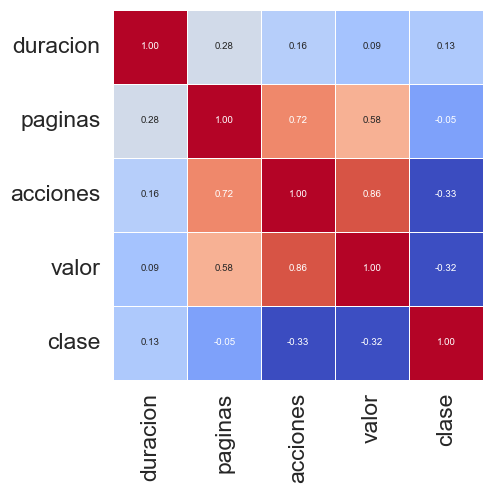

In [6]:
sns.set(font_scale=1.5) # Establecer el tamaño de la fuente
sns.heatmap(
    corr_matrix, xticklabels='auto', yticklabels='auto', cmap='coolwarm', annot=True, fmt='.2f', # Crear mapa de calor
    cbar=False, # No mostrar barra de color
    square=True, # Ajustar celdas a cuadradas
    annot_kws={'size': 7}, # Tamaño de los valores
    linewidth=.5, # Ancho de las líneas entre celdas
)

# Muestra el gráfico
plt.show() 

In [7]:
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


### División entrenamiento-test

In [19]:
X = df.drop('clase', axis=1)
y = df['clase']


In [21]:
print("Variables independientes:", X) 
print("\nVariable dependiente:", y)

Variables independientes:      duracion  paginas  acciones  valor
0         7.0        2         4      8
1        21.0        2         6      6
2        57.0        2         4      4
3       101.0        3         6     12
4       109.0        2         6     12
..        ...      ...       ...    ...
165      13.0        1         7     42
166      12.0        1         2      6
167      13.0        1         3      9
168      13.0        1         7     28
169      12.0        1         6     18

[170 rows x 4 columns]

Variable dependiente: 0      2
1      2
2      2
3      2
4      2
      ..
165    0
166    0
167    0
168    0
169    0
Name: clase, Length: 170, dtype: int64


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [23]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [24]:
print("\nX Entrenamiento:",X_train) 
print("\ny test:",y_test)


X Entrenamiento: [[-4.92063877e-01 -7.10559205e-01 -7.28997052e-01 -6.65383548e-01]
 [-3.19624697e-01 -6.59804976e-02 -1.25852911e-01 -5.08111073e-02]
 [-4.87403358e-01 -7.10559205e-01 -2.26376935e-01  1.06461368e-02]
 [ 2.28560506e+00  5.78598210e-01  2.08567560e+00  5.22789837e-01]
 [-4.96724395e-01 -7.10559205e-01 -2.26376935e-01 -1.32754099e-01]
 [-5.38244953e-01  1.86775563e+00 -4.27424982e-01 -6.03926304e-01]
 [-4.87403358e-01 -7.10559205e-01 -6.28473029e-01 -5.21983312e-01]
 [-4.87403358e-01 -7.10559205e-01 -7.28997052e-01 -6.24412052e-01]
 [-4.96724395e-01 -6.59804976e-02  7.51951357e-02  1.13074877e-01]
 [ 9.38715259e-01 -7.10559205e-01 -2.26376935e-01 -1.32754099e-01]
 [ 1.27785065e-01 -6.59804976e-02  7.51951357e-02 -9.17826034e-02]
 [-4.96724395e-01 -7.10559205e-01 -6.28473029e-01 -5.83440556e-01]
 [-5.41348858e-01  1.22317692e+00  1.88462756e+00  4.40846845e-01]
 [-4.92063877e-01 -7.10559205e-01 -6.28473029e-01 -6.44897800e-01]
 [-4.78082321e-01 -6.59804976e-02 -7.2899705

### Bosques aleatorios (Random Forest)

In [25]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### Validación del modelo

In [27]:
y_pred = model.predict(X_test) # Predecimos con el modelo de Vecinos cercanos KNN
#Muestro las 5 primeras predicciones
print(y_pred[0:5]) 

[1 0 0 0 1]


In [28]:
algoritmo = 'Bosques aleatorios'
# Calculo score del modelo con el set de entrenamiento
train_score = model.score(X_train, y_train) 
# Calculo score del modelo con el set de prueba
test_score = model.score(X_test, y_test)

print("{} precisión del set de entrenamiento: {}".format(algoritmo, train_score))
print("{} precisión del set de prueba: {}".format(algoritmo, test_score))

Bosques aleatorios precisión del set de entrenamiento: 0.9921259842519685
Bosques aleatorios precisión del set de prueba: 0.7674418604651163


#### Matriz de confusión

In [29]:
cm = confusion_matrix(y_test, y_pred)

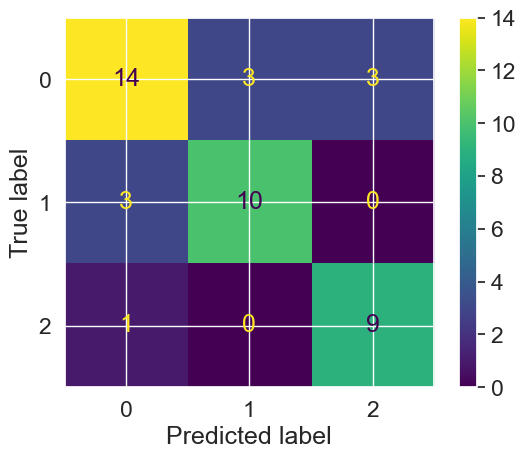

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay 
disp= ConfusionMatrixDisplay (confusion_matrix=cm)  
disp.plot()  
plt.show() 

### Predicción con usuario ficticio

In [32]:
usuario_ficticio = pd.DataFrame({'duracion': [10],
                              'paginas': [3],
                              'acciones': [5],
                              'valor': [9]})

prediccion = model.predict(usuario_ficticio.values)


In [33]:
if prediccion == 0:
    print("El usuario ficticio utiliza Windows.")
elif prediccion == 1:
    print("El usuario ficticio utiliza Macintosh.")
else:
    print("El usuario ficticio utiliza Linux.")


El usuario ficticio utiliza Windows.
